# ch02 퍼셉트론

## 2.1 퍼셉트론 이란?

<p>
퍼셉트론은 다수의 신호를입력으로 받아 하나의 신호를 출력한다.</br>
퍼셉트온 신호는 '흐른다/안 흐른다.(1이나 0)'의 두가지 값을 가질 수 있다.
</p>


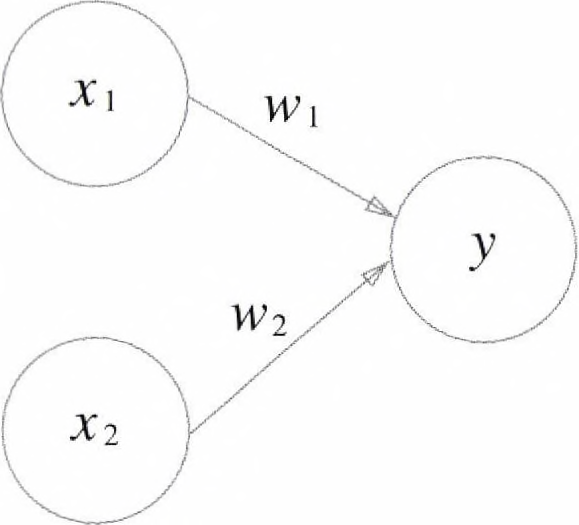

입력으로 두개의 신호를 받은 퍼셉트론

x1과 x2는 입력신호, y는 출력신호, w1과 w2는 가중치를 의미한다.</br>
그림에 있는 하나의 원을 **뉴런** 또는 **노드** 라고 부른다.</br>
입력신호가 뉴런에 보내질 때는 각각 고유한 가중치가 곱해진다.(w1x1,w2x2)</br>
</br>
뉴런에서 보내온 신호의 총합이 정해진 한계를 넘어설 때만 1을 출력한다(뉴런이 활성화 한다.)</br>
뉴런의 한계는 임계값(threshold)라고 하며, $\theta$ 로 나타낸다.

$$y = \begin{cases}0&(w_{1}*x_{1} + w_{2}*x_{2}\leq{\theta})\\1 &(w_{1}*x{1} + w_{2}*x_{2}>{\theta})\end{cases}$$

퍼셉트론은 복수의 입력 신호 각각에 고유한 가중치를 부여한다.</br>
가중치가 클수록 해당 신호가 그만큼 더 중요하다는 의미.

## 2.2 단순한 논리회로

### 2.2.1 AND 게이트

AND 게이트는 입력이 둘이고 출력은 하나이다.</br>
두 입력이 모두 1일 때만 1을 출력하고 그외에는 0을 출력한다.

|x1 |x2| y|
|:---:|:---:|:---:|
|0|0|0|
|1|0|0|
|0|1|0|
|1|1|1|

AND게이트의 진리표

### 2.2.2 NAND게이트와 OR게이트

NAND는 Not AND를 의미하며, AND게이트의 출력을 뒤집은 형태로 동작한다.

x1과 x2가 모두 1일 때만 0을 출력하고, 그 외에는 1을 출력한다.

|x1|x2|y|
|:---:|:---:|:---:|
|0|0|1|
|1|0|1|
|0|1|1|
|1|1|0|

NAND 게이트의 진리표

|x1|x2|y|
|:---:|:---:|:---:|
|0|0|0|
|1|0|1|
|0|1|1|
|1|1|1|

OR 게이트의 진리표

프로그래머가 진리표라는 `학습데이터`를 보면서 매개변수의 값을 생각한다.</br>
기계학습 문제는 이 매개변수의 값을 정하는 작업을 컴퓨터가 자동으로 하도록 한다.</br>
`학습`이란 적절한 매개변수 값을 정하는 작업이며, 사람은 퍼셉트론의 구조(모델)를 고민하고 컴퓨터에 학습할 데이터를 주는 일을 한다.

퍼셉트론의 구조는 AND,NAND,OR 게이트 모두에서 `똑같다`, 세가지 게이트에서 다른것은 매개변수(가중치와 임계값)의 값뿐이다.</br>
똑같은 구조의 퍼셉트론이 매개변수의 값만 적절히 조정하여,AND,NAND, OR로 변하는 것이다.

## 2.3 퍼셉트론 구현하기

### 2.3.1 간단한 구현
AND함수의 구현

In [1]:
def AND(x1,x2):
    w1,w2,theta = (0.5,0.5,0.7)
    tmp = x1*w1 + x2*w2 #가중치 곱
    if tmp <=theta: #임계값(theta)을 못 넘을 때
        return 0
    elif tmp> theta: #임계값(theta)을 넘을 때
        return 1

매개변수 w1,w2,theta는 함수 안에서 초기화 하고, 가중치를 곱한 입력의 총합이 임계값을 넘으면 1을 반환하고,</br>
그 외에는 0을 반환한다.

In [2]:
print(AND(0,0))    # tmp = 0, 0을 출력
print(AND(0,1))    # tmp = 0.5*1 = 0.5, 0을 출력
print(AND(1,0))    # tmp = 0.5*1 = 0.5, 0을 출력
print(AND(1,1))    # tmp = 0.5*1 + 0.5*1 = 1 > 0.7, 1을 출력

0
0
0
1


### 2.3.2 가중치와 편향 도입

$$y = \begin{cases}0&(w_{1}*x_{1} + w_{2}*x_{2}\leq{\theta})\\1 &(w_{1}*x{1} + w_{2}*x_{2}>{\theta})\end{cases}$$

위의 식에서 $\theta$를 $-b$로 치환하면 퍼셉트론의 동작이 다음과 같아진다.

$$y = \begin{cases}0&(b + w_{1}*x_{1} + w_{2}*x_{2}\leq{0})\\1 &(b + w_{1}*x{1} + w_{2}*x_{2}>{0})\end{cases}$$

여기에서 $b$를 `편향(bias)`이라 하며, $w_{1}$과 $w_{2}$는 그대로 `가중치(weight)`이다.</br>
퍼셉트론은 입력신호에 가중치를 곱한 값과 편향을 합하여, 그 값이 0을 넘으면 1을 출력하고, 그렇지 않으면 0 을 출력한다.</br>

넘파이를 사용하여, 구하기

In [3]:
import numpy as np

In [4]:
x = np.array([0,1])    #입력
w = np.array([0.5,0.5])    #가중치
b = -0.7    #편향

In [5]:
w*x

array([0. , 0.5])

In [6]:
np.sum(w*x)

np.float64(0.5)

In [7]:
np.sum(w*x)+b    # 대략 -0.2 (부동소수점 수에 의한 연산 오차)

np.float64(-0.19999999999999996)

넘파이 배열끼리의 곱셈은 두 배열의 원소 수가 같다면 각 원소끼리 곱한다.</br>
그래서 위에서 w*x에서는 인덱스가 같은 원소끼리 곱한다.([0,1] *[0.5,0.5] => [0,0.5])

또, `np.sum()` 메서드는 입력한 배열에 담긴 모든 원소의 총합을 계산한다.</br>
이 가중치에 편향을 더하면 위의 식의 계산이 완료된다.

### 2.3.3 가중치와 편향 구현하기

'가중치와 편향을 도입'한 AND 게이트는 다음과 같이 구현할 수 있다.

In [8]:
def AND(x1,x2):
    x = np.array([x1,x2])
    w = np.array([0.5,0.5])
    b = -0.7
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    elif tmp > 0:
        return 1

여기에서 $\theta$가 편향 $b$로 치환되었다.</br>
그리고 편향은 가중치 $w_{1}, w_{2}$와는 기능이 다르다.</br>
$w_{1}$과 $w_{2}$는 각 입력 신호가 결과에 주는 영향력(중요도)을 조절하는 매개변수고,</br>
편향은 뉴런이 얼마나 쉽게 활성화(결과로 1을 출력)하느냐를 조정하는 매개변수이다.

<p>
    예를 들어 $b$가 -0.1이면 각 입력 신호에 가중치를 곱한 값들의 합이 0.1을 초과할 때만 
    뉴런이 활성화한다.</br>
    반면 $b$가 -20.0이면, 각 입력 신호에 가중치를 곱한 값들의 합이 20.0을 넘지 않으면 뉴런은 활성화하지 않는다.</br>
    이처럼 편향의 값은 뉴런이 얼마나 쉽게 활성화 되는지를 결정한다.
</p>

NAND 게이트와 OR게이트 구현

In [9]:
def NAND(x1,x2):
    x = np.array([x1,x2])
    w = np.array([-0.5, -0.5])    # AND와는 가중치(w와 b)만 다르다.
    b = 0.7
    tmp = np.sum(w*x) + b
    if tmp<=0:
        return 0
    else:
        return 1
def OR(x1,x2):
    x = np.array([x1,x2])
    w = np.array([0.5,0.5])    # AND와는 가중치(w와 b)만 다르다.
    b = -0.2
    tmp = np.sum(w*x) + b
    if tmp<=0:
        return 0 
    else:
        return 1

AND, NAND, OR는 모두 같은 구조의 퍼셉트론이고, 차이는 가중치 매개변수의 값 뿐이다.</br>
실제로 파이썬으로 작성한 NAND와 OR 게이트의 코드에서도 AND와 다른 부분은 가중치와 편향 값을 설정하는 부분 뿐이다.

### 2.4.1 XOR 게이트

XOR 게이트는 `배타적 논리합`이라는 논리회로 이다.</br>
$x_{1}$과$x_{2}$중 한쪽이 1일때만 1을 출력한다.

|$x_{1}$|$x_{2}$|$y$|
|:---:|:---:|:---:|
|0|0|0|
|1|0|1|
|0|1|1|
|1|1|0|

XOR 게이트의 진리표

지금까지 본 퍼셉트론으로는 XOR게이트를 구현할 수 없다.
OR 게이트의 경우 가중치 매개변수가 $(b,w_{1},w_{2}) = (-0.5,1.0,1.0)$ 일때 진리표를 만족한다.</br>
이때의 퍼셉트론은 다음과 같이 표현된다.

$$y = \begin{cases}0&(-0.5 + x_{1} + x_{2}\leq{0})\\1 &(-0.5 + x{1} + x_{2}>{0})\end{cases}$$

이 식의 퍼셉트론은 직선으로 나뉜 두 영역을 만든다, 직선으로 나뉜 한쪽 영역은 1을 출력하고, 다른 한쪽은 0 을 출력한다.

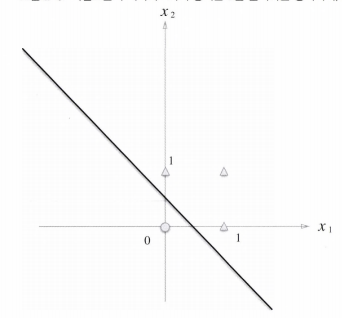 OR 게이트

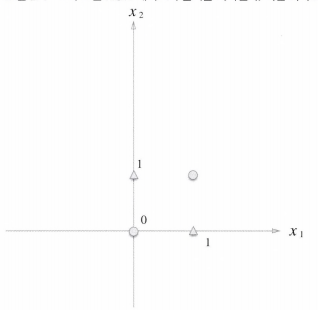 XOR 게이트

동그라미와 세모를 직선 하나로 나눌수는 없다.

### 2.4.2 선형과 비선형

하지만 직선이라는 제약을 없애면, 나눌수 있다.

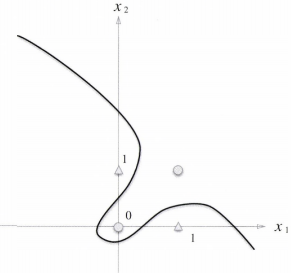

퍼셉트론은 직선 하나로 나눈 영역만 표현할 수 있다는 한계가 있다.</br>
위와 같은 곡선의 영역을 `비선형` 영역, 직선의 영역을 `선형`영역이라고 한다.

## 2.5 다층 퍼셉트론

퍼셉트론으로는 XOR게이트를 표현할 수 없었다.</br>
하지만 퍼셉트론은 층을 쌓아 `다층 퍼셉트론(multi-layer perceptron)`을 만들 수 있다.

### 2.5.1 기존 게이트 조합

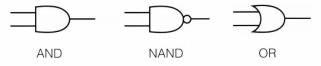

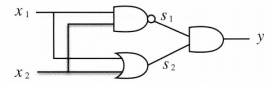 XOR게이트 구현

### 2.5.2 XOR 게이트 구현

In [10]:
def XOR(x1,x2):
    s1 = NAND(x1,x2)
    s2 = OR(x1,x2)
    y = AND(s1,s2)
    return y

In [11]:
print(XOR(0,0))    # 0을 출력
print(XOR(1,0))    # 1을 출력
print(XOR(0,1))    # 1을 출력
print(XOR(1,1))    # 0을 출력

0
1
1
0


퍼셉트론으로 표현하면 다음과 같다.

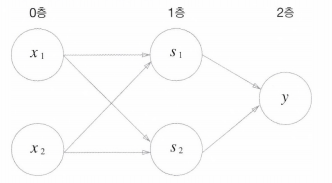

이처럼 층이 여러 개인 퍼셉트론을 다층 퍼셉트론이라 한다.</br>
`단층 퍼셉트론으로는 표현하지 못한 것을 층을 하나 늘려 구현` 하였다.

## 2.6 정리

- 퍼셉트론은 입룰력을 갖춘 알고리즘 이다. 입력을 주면 정해진 규칙에 따른 값을 출력한다.
- 퍼셉트론에서는 `가중치`와`편향`을 매개변수로 설정한다.
- 퍼셉트론으로 AND, OR 게이트 등의 논리회로를 표현할 수 있다.
- XOR 게이트는 단층 퍼셉트론으로는 표현할 수 없다.
- 2층 퍼셉트론을 이용하면 XOR 게이트를 표현할 수 있다.
- 단층 퍼셉트론은 직선형 영역만 표현할 수 있고, 다층 퍼셉트론은 비선형 영역도 표현할 수 있다.
- 다층 퍼셉트론은 (이론상) 컴퓨터를 표현할 수 있다.

출처 : <밑바닥부터 시작하는 딥러닝 1>, 사이토 고키, 한빛미디어